The query `
MATCH (c:Compartment)-[r:CONSUMIU]->(p:Product)
RETURN c.name AS Compartment, r.date AS Date, COUNT(r) AS NumberOfConnections
ORDER BY c.name, r.date
` returned 16 records in 1 ms.
                                          Compartment        Date  \
0         ritm0021660bilhetagemapi/BilhetagemAPI_DIPP  05/02/2025   
1         ritm0021660bilhetagemapi/BilhetagemAPI_DIPP  07/02/2025   
2   ritm0023258pococrinssdiia/poc-ocr-atestado-medico  05/02/2025   
3   ritm0023258pococrinssdiia/poc-ocr-atestado-medico  07/02/2025   
4                               sandboxdgi/BGCadUnico  05/02/2025   
5                               sandboxdgi/BGCadUnico  07/02/2025   
6                         sandboxdgi/Compartment_DEST  05/02/2025   
7                         sandboxdgi/Compartment_DEST  07/02/2025   
8        sandboxdgi/Compartment_DEST/Compartment_DIBD  05/02/2025   
9        sandboxdgi/Compartment_DEST/Compartment_DIBD  07/02/2025   
10       sandboxdgi/Compartment_DEST/Compartment

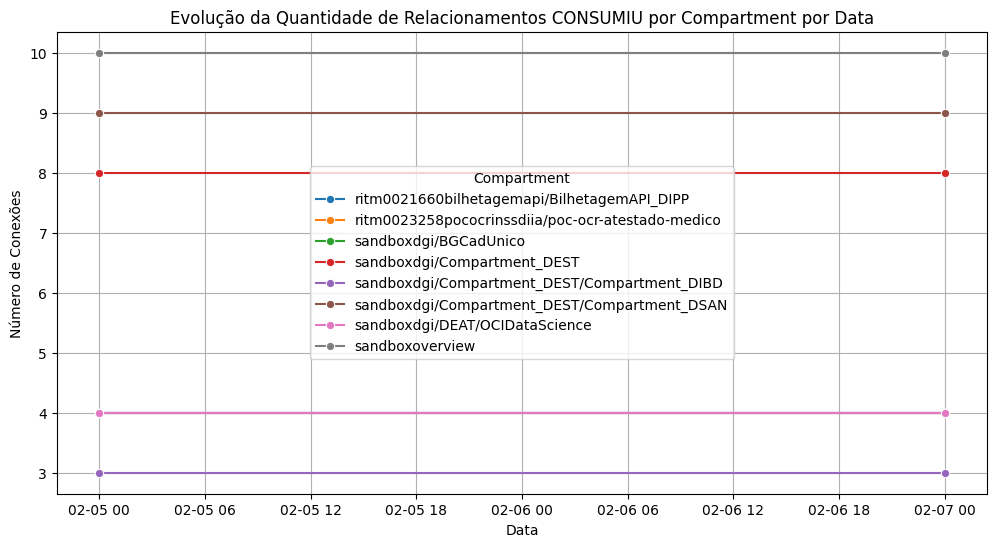

In [8]:
from neo4j import GraphDatabase
from dotenv import load_dotenv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
# Carrega os parâmetros do arquivo env.dev
load_dotenv()

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI =os.getenv('NEO4J_URI')
AUTH = (os.getenv('NEO4J_USER'), os.getenv('NEO4J_PASSWORD'))

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()


driver = GraphDatabase.driver(URI, auth=AUTH)
session = driver.session(database="neo4j")


query = '''
MATCH (c:Compartment)-[r:CONSUMIU]->(p:Product)
RETURN c.name AS Compartment, r.date AS Date, COUNT(r) AS NumberOfConnections
ORDER BY c.name, r.date
'''


records, summary, keys = driver.execute_query(query, )
print("The query `{query}` returned {records_count} records in {time} ms.".format(query=summary.query, records_count=len(records),time=summary.result_available_after, ))

# Converte os registros em um DataFrame do pandas
df = pd.DataFrame(records, columns=['Compartment', 'Date', 'NumberOfConnections'])

print(df)

# Converte a coluna Date para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")


# Cria um gráfico de linha mostrando a evolução dos relacionamentos CONSUMIU por Compartment por data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='NumberOfConnections', hue='Compartment', marker='o')

plt.title('Evolução da Quantidade de Relacionamentos CONSUMIU por Compartment por Data')
plt.xlabel('Data')
plt.ylabel('Número de Conexões')
plt.legend(title='Compartment')
plt.grid(True)
plt.show()

# session/driver usage
session.close()
driver.close()

